In [31]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(feature_train, label_train), (feature_test, label_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


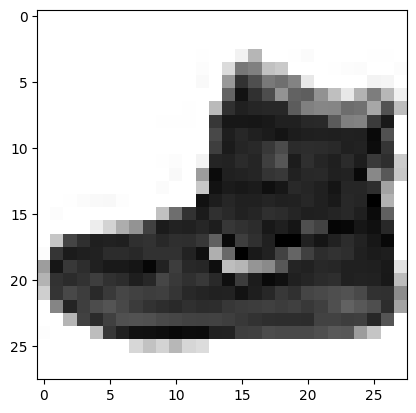

In [4]:
plotter.imshow(feature_train[0], cmap = "binary")

In [7]:
# np.max(feature_train[0])
feature_train = feature_train/255
feature_test = feature_test/255

In [9]:
feature_test.shape

(10000, 28, 28)

In [10]:
feature_train = feature_train.reshape((60000, 28, 28, 1))
feature_test = feature_test.reshape((10000, 28, 28, 1))

In [11]:
cat_label_train = to_categorical(label_train, num_classes = 10)
cat_label_test = to_categorical(label_test, num_classes = 10)

In [13]:
stopper = EarlyStopping(patience = 2)
image_learner = Sequential()
image_learner.add(Conv2D(filters = 32, activation = "relu", kernel_size = (4, 4)))
image_learner.add(MaxPool2D())
image_learner.add(Dropout(0.1))
image_learner.add(Conv2D(filters = 64, activation = "relu", kernel_size = (4, 4)))
image_learner.add(MaxPool2D())
image_learner.add(Dropout(0.2))
image_learner.add(Flatten())
image_learner.add(Dense(128, activation = "relu"))
image_learner.add(Dense(10, activation = "softmax"))
image_learner.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
image_learner.fit(x = feature_train, y = cat_label_train, epochs = 50, validation_data = (feature_test, cat_label_test), callbacks = [stopper], use_multiprocessing = True)

Epoch 1/50
1875/1875 [==============================] - 42s 21ms/step - loss: 0.5002 - accuracy: 0.8158 - val_loss: 0.3911 - val_accuracy: 0.8592
Epoch 2/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3464 - accuracy: 0.8734 - val_loss: 0.3313 - val_accuracy: 0.8777
Epoch 3/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3053 - accuracy: 0.8861 - val_loss: 0.3043 - val_accuracy: 0.8878
Epoch 4/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2763 - accuracy: 0.8978 - val_loss: 0.2970 - val_accuracy: 0.8896
Epoch 5/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2591 - accuracy: 0.9027 - val_loss: 0.2759 - val_accuracy: 0.8967
Epoch 6/50
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2397 - accuracy: 0.9101 - val_loss: 0.2668 - val_accuracy: 0.9043
Epoch 7/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2295 - accuracy: 0.9140 - val_loss: 0.2720 -

In [18]:
preds = np.argmax(image_learner.predict(feature_test), axis = -1)

313/313 [==============================] - 2s 5ms/step


<Axes: >

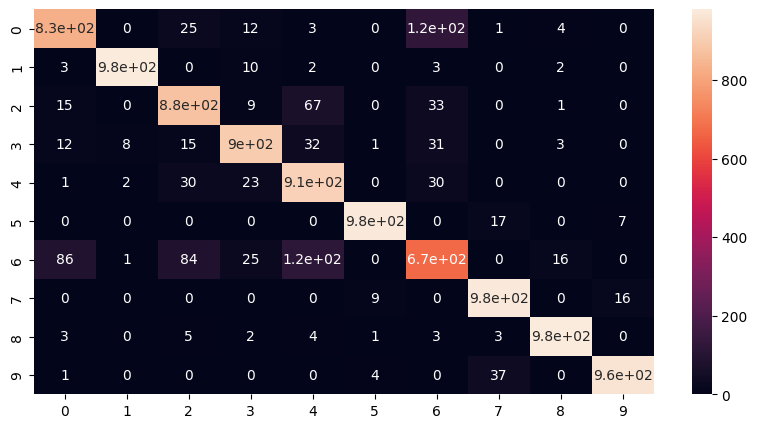

In [22]:
plotter.figure(figsize = (10, 5), dpi = 100)
sns.heatmap(confusion_matrix(label_test, preds), annot = True)

In [23]:
print(classification_report(label_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.88      0.86      1000
           3       0.92      0.90      0.91      1000
           4       0.80      0.91      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.67      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



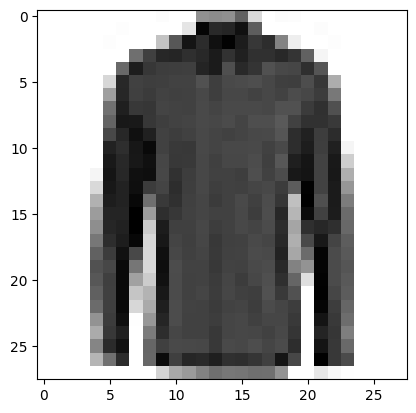

In [29]:
plotter.imshow(feature_test[9000], cmap = "binary")

In [30]:
np.argmax(image_learner.predict(feature_test[9000].reshape(1, 28, 28, 1)), axis = -1)

1/1 [==============================] - 0s 30ms/step


array([6], dtype=int64)

In [36]:
metrics = pan.DataFrame(image_learner.history.history)

In [37]:
metrics.columns

RangeIndex(start=0, stop=0, step=1)